In [47]:
import Parser, Deriver, Interpreter, Analyser, SelfOrg
import numpy as np
import math

In [48]:
modelName = 'Leafy_Oak'

In [49]:
# Have to generate manually as we want points to be same for render and stats.
# We also want to be able to access some inner stuff for plotting

In [50]:
Specification   = Parser.parse('Specifications/'+modelName+'.txt', {})

In [51]:
scale = 1

In [52]:
Specification

{'age_limit': 1000,
 'gen_limit': 1000,
 'self_org': True,
 'defaults': {},
 'sections': {'1': {'constructer': Cell.Sig,
   'slash': 35.0,
   'slashr': 10.0,
   'plus': 90.0,
   'plusr': 10.0,
   'decay': 0.6,
   'd': 0.5,
   'h': 20.0,
   'w': 1.0,
   'rules': [['GEOM', [0.8], '0[>1]+[>1]+[>1]+[>1]'],
    ['GEOM', [0.8], '0[>1]+[>1]+[>1]']],
   'id': '1',
   'width': 5.0}},
 'axiom': <Cell.Sig at 0x7f6650c1ef98>,
 'depth': 5,
 'thickness': 5.0,
 'num_voxels': 50,
 'shadow_width': 3,
 'shadow_height': 30,
 'dec_close': 0.4,
 'dec_far': 1.0}

In [53]:
points = []

if Specification['self_org'] == False:

    # DERIVE
    n               = Specification['depth']
    axiom           = Specification['axiom']
    tree            = [axiom]
    tree            = Deriver.derive(tree,n)

    # INTERPRET
    points, scale   = Interpreter.interpret(tree, True, return_scale=True)

else:

    # DERIVE AND INTERPRET TOGETHER
    n               = Specification['depth']
    axiom           = Specification['axiom']
    tree            = [axiom]
    num_voxels      = Specification['num_voxels']
    shadow_height   = Specification['shadow_height']
    shadow_width    = Specification['shadow_width']
    decrement_close = Specification['dec_close']
    decrement_far   = Specification['dec_far']

    for i in range(0,n):
        tree = Deriver.derive(tree,1)
        points, scale = Interpreter.interpret(tree, True, return_scale = True)
        voxels          = SelfOrg.calc_light(points,
                                             num_voxels,
                                             shadow_height,
                                             shadow_width,
                                             decrement_close,
                                             decrement_far)
        SelfOrg.update_cells(tree, voxels, scale)
        print("Interpreted for the "+str(i+1)+"th time.")

Interpreted for the 1th time.
Interpreted for the 2th time.
Interpreted for the 3th time.
Interpreted for the 4th time.
Interpreted for the 5th time.


In [54]:
# So we can view what we visualised
print("writing to file...")
with open("data.dat", mode="w") as f:
    f.write(str(len(points))+"\n")
    for p in points:
        x,y,z,r,a,b,c,d,l = p
        x /= scale
        y /= scale
        y -= 0.5
        z /= scale
        r /= scale
        line = [x,y,z,r,l]
        for feature in line:
            f.write(str(feature)+"\t")
        f.write("\n")
print("done writing.")

writing to file...
done writing.


In [55]:
points[0]

(0, 0, 0, 5.0, 0.0, 270.0, 0.0, 20.0, 0.0)

In [56]:
points[1]

(7.498798913309288e-32,
 20.0,
 -1.2246467991473533e-15,
 3.0,
 0.0,
 270.0,
 0.0,
 20.0,
 0.0)

In [57]:
points[2]
full_points = points
full_points = np.array(points)

In [58]:
points = points[2:]

In [59]:
metrics         = Analyser.analyse(points)

In [60]:
vertices        = np.array(points)

In [61]:
for (k,v) in metrics.items():
    print(k, ':', v)

parentAngle_mean : 31.280696858639843
parentAngle_variance : 15.225209184391744
length_mean : 1.6462834256170156
length_variance : 1.065797711130885
verticalOrientation_mean : 68.57727991692992
verticalOrientation_variance : 33.81602370181115
horizontalOrientation_mean : 199.261443221413
horizontalOrientation_variance : 99.61423275553656
q1_xyz : (6.363382985747244, 0.888097021578151, 2.3895867854896693)
q2_xyz : (45.629249961877804, 19.647113600005596, 42.63167508224548)
q3_xyz : (59.20237411321098, 21.588359607300987, 47.950855254227726)
xyz : (59.20237411321098, 39.80632700456051, 47.950855254227726)
trunk_length : 20.0
totalBiomass : 3207.697388813226


In [62]:
math.degrees(metrics['parentAngle_mean'])

1792.2519102281954

In [63]:
vertices[:,5].mean()

199.26144322141312

In [64]:
import matplotlib.pyplot as plt

In [65]:
#Fed up of accessing via numerical values
# Format of points is:
# 0--1--2--3--4--5--6--7--8
# x  y  z  r  vA hA pA l--leaf
keys = {
    'x': 0,
    'y': 1,
    'z': 2,
    'radius': 3,
    'vertical orientation': 4,
    'horizontal orientation': 5,
    'parent angle': 6,
    'length': 7,
    'leaf': 8
}

(array([2784.,    0.,    0.,  808.,    0.,    0.,    0.,    0.,    0.,
         146.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,   14.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,   12.]),
 array([ 1.21212121,  1.54882155,  1.88552189,  2.22222222,  2.55892256,
         2.8956229 ,  3.23232323,  3.56902357,  3.90572391,  4.24242424,
         4.57912458,  4.91582492,  5.25252525,  5.58922559,  5.92592593,
         6.26262626,  6.5993266 ,  6.93602694,  7.27272727,  7.60942761,
         7.94612795,  8.28282828,  8.61952862,  8.95622896,  9.29292929,
         9.62962963,  9.96632997, 10.3030303 , 10.63973064, 10.97643098,
        11.31313131, 11.64983165, 11.98653199, 12.32323232, 12.65993266,
        12.996633  , 13.33333333]),
 <a list of 36 Patch objects>)

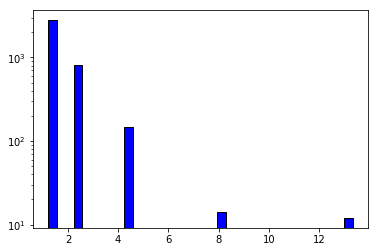

In [98]:
plt.hist(vertices[:,keys['length']], color='blue', edgecolor='black', bins=36, log=True)

In [67]:
max_height = np.max(vertices[:,keys['y']])

In [68]:
lower_third  = full_points[full_points[:,keys['y']] < max_height/3]
middle_third = full_points[full_points[:,keys['y']] < 2*max_height/3]
middle_third = middle_third[middle_third[:,keys['y']] > max_height/3]
upper_third = full_points[full_points[:,keys['y']] > 2*max_height/3]

In [69]:
points[0]

(7.498798913309288e-32,
 20.0,
 -1.2246467991473533e-15,
 3.0,
 15.757390959098958,
 90.00000000000001,
 15.757390959098958,
 13.333333333333334,
 0.0)

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2.,
        6., 1.]),
 array([ 0.        ,  0.52508712,  1.05017423,  1.57526135,  2.10034846,
         2.62543558,  3.15052269,  3.67560981,  4.20069692,  4.72578404,
         5.25087115,  5.77595827,  6.30104538,  6.8261325 ,  7.35121961,
         7.87630673,  8.40139384,  8.92648096,  9.45156807,  9.97665519,
        10.5017423 , 11.02682942, 11.55191653, 12.07700365, 12.60209076,
        13.12717788, 13.65226499, 14.17735211, 14.70243922, 15.22752634,
        15.75261345, 16.27770057, 16.80278768, 17.3278748 , 17.85296191,
        18.37804903, 18.90313614]),
 <a list of 36 Patch objects>)

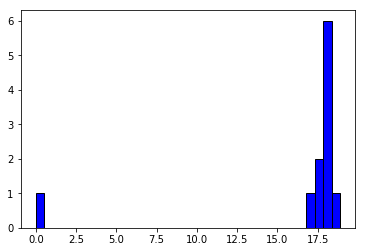

In [70]:
plt.hist(lower_third[:,keys['y']], color='blue', edgecolor='black', bins=36)

(array([  7.,   6.,  23.,  54.,  95.,  64.,  59.,  77.,  88.,  61., 109.,
         79.,  45.,  32.,  26.,  30.,  85.,  97.,  43.,  48.,  46.,  55.,
         26.,  51.,  35.,  43.,  48.,  39.,  60.,  38.,  35.,  17.,   4.,
          0.,   2.,   2.]),
 array([-23.4657916 , -22.06346928, -20.66114696, -19.25882465,
        -17.85650233, -16.45418001, -15.05185769, -13.64953537,
        -12.24721305, -10.84489073,  -9.44256841,  -8.0402461 ,
         -6.63792378,  -5.23560146,  -3.83327914,  -2.43095682,
         -1.0286345 ,   0.37368782,   1.77601014,   3.17833245,
          4.58065477,   5.98297709,   7.38529941,   8.78762173,
         10.18994405,  11.59226637,  12.99458868,  14.396911  ,
         15.79923332,  17.20155564,  18.60387796,  20.00620028,
         21.4085226 ,  22.81084492,  24.21316723,  25.61548955,
         27.01781187]),
 <a list of 36 Patch objects>)

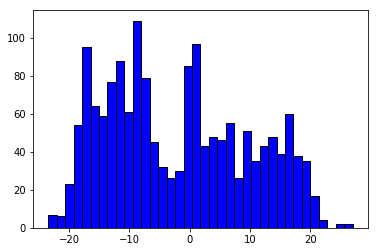

In [71]:
plt.hist(middle_third[:,keys['x']], color='blue', edgecolor='black', bins=36)

(array([ 10.,  17.,  33.,  28.,  56.,  70.,  51.,  51.,  36.,  70.,  61.,
         78.,  59.,  66.,  87.,  57., 118., 169., 146., 165., 134.,  80.,
         68.,  70.,  59.,  46.,  23.,   8.,   3.,   0.,   0.,  11.,  57.,
         70.,  50.,  19.]),
 array([-29.24824202, -27.60995243, -25.97166284, -24.33337325,
        -22.69508365, -21.05679406, -19.41850447, -17.78021488,
        -16.14192529, -14.50363569, -12.8653461 , -11.22705651,
         -9.58876692,  -7.95047732,  -6.31218773,  -4.67389814,
         -3.03560855,  -1.39731896,   0.24097064,   1.87926023,
          3.51754982,   5.15583941,   6.794129  ,   8.4324186 ,
         10.07070819,  11.70899778,  13.34728737,  14.98557696,
         16.62386656,  18.26215615,  19.90044574,  21.53873533,
         23.17702492,  24.81531452,  26.45360411,  28.0918937 ,
         29.73018329]),
 <a list of 36 Patch objects>)

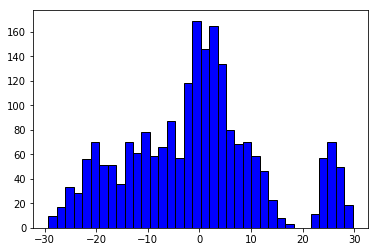

In [72]:
plt.hist(upper_third[:,keys['x']], color='blue', edgecolor='black', bins=36)

In [73]:
# Problem with these graphs is that they weight all nodes equally, regardless of size and mass
# Create metric that calculates biomass for each thing, then adds that many of itself to distribution.

weighted_ps = []

In [74]:
vertices.shape[0]/2

1882.0

In [75]:
ps = zip(points[::2], points[1::2])

In [76]:
points[30]

(0.5730704699655693,
 38.57329112868691,
 6.578879336925116,
 0.6479999999999999,
 35.92024267281202,
 358.4511222966686,
 22.366565610026367,
 1.2121212121212122,
 1.0)

In [77]:
weights = np.array([Analyser.volumeOfConic(r1,r2,l) for ((x,y,z,r1,va,ha,pa,l,leaf),(x2,y2,z2,r2,va2,ha2,pa2,l2,leaf)) in ps])

In [78]:
weights.sum()

3207.697388813233

In [79]:
log_weights = [(Analyser.volumeOfConic(r1,r2,l)) for ((x,y,z,r1,va,ha,pa,l,leaf),(x2,y2,z2,r2,va2,ha2,pa2,l2,leaf)) in ps]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]),
 array([0.        , 0.02777778, 0.05555556, 0.08333333, 0.11111111,
        0.13888889, 0.16666667, 0.19444444, 0.22222222, 0.25      ,
        0.27777778, 0.30555556, 0.33333333, 0.36111111, 0.38888889,
        0.41666667, 0.44444444, 0.47222222, 0.5       , 0.52777778,
        0.55555556, 0.58333333, 0.61111111, 0.63888889, 0.66666667,
        0.69444444, 0.72222222, 0.75      , 0.77777778, 0.80555556,
        0.83333333, 0.86111111, 0.88888889, 0.91666667, 0.94444444,
        0.97222222, 1.        ]),
 <a list of 36 Patch objects>)

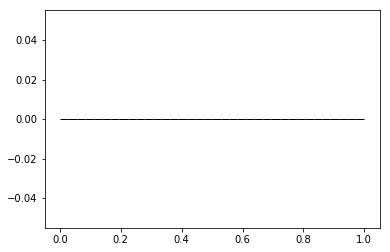

In [80]:
plt.hist(log_weights, color='black', edgecolor='black', bins=36)

In [81]:
n = weights.shape[0]
n

1882

In [82]:
import math

In [83]:
points[34]

(1.146140939931139,
 40.8486148601143,
 6.754447937727104,
 0.3887999999999999,
 37.855911707942084,
 357.76327790060463,
 24.345752721014684,
 1.2121212121212122,
 1.0)

In [84]:
for i in range(n):
    for j in range(math.floor(math.log(weights[i]))):
        weighted_ps.append(points[2*i])

In [85]:
weighted_ps = np.array(weighted_ps)
weighted_ps.shape
weighted_ps[3]

array([ 7.49879891e-32,  2.00000000e+01, -1.22464680e-15,  3.00000000e+00,
        1.57573910e+01,  9.00000000e+01,  1.57573910e+01,  1.33333333e+01,
        0.00000000e+00])

(array([48.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  7.,  2.,
         6.,  6., 10.,  5.,  6.,  6.,  6.,  6.,  1.,  1.,  5.,  5., 10.,
         5.,  7.,  4.,  5.,  5.,  5., 13.,  9.,  1., 16.]),
 array([ 0.        ,  1.50111282,  3.00222564,  4.50333846,  6.00445129,
         7.50556411,  9.00667693, 10.50778975, 12.00890257, 13.51001539,
        15.01112821, 16.51224103, 18.01335386, 19.51446668, 21.0155795 ,
        22.51669232, 24.01780514, 25.51891796, 27.02003078, 28.5211436 ,
        30.02225643, 31.52336925, 33.02448207, 34.52559489, 36.02670771,
        37.52782053, 39.02893335, 40.53004618, 42.031159  , 43.53227182,
        45.03338464, 46.53449746, 48.03561028, 49.5367231 , 51.03783592,
        52.53894875, 54.04006157]),
 <a list of 36 Patch objects>)

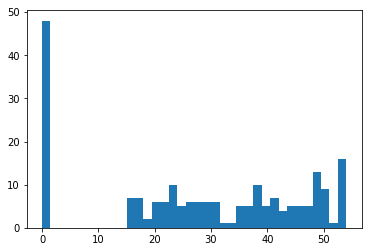

In [86]:
plt.hist(weighted_ps[:, keys['parent angle']], bins=36)

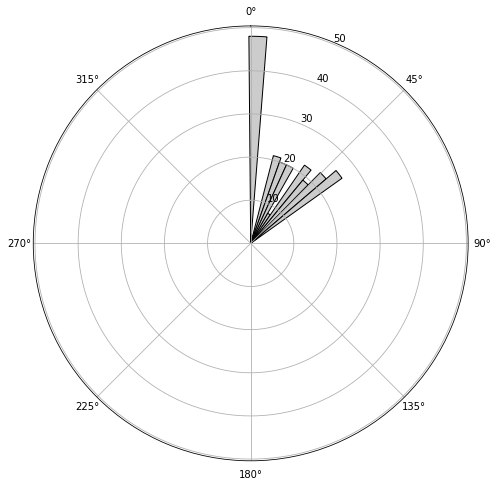

<Figure size 432x288 with 0 Axes>

In [95]:
degrees = weighted_ps[:,keys['parent angle']]
radians = np.deg2rad(degrees)

bin_size = 5
a , b=np.histogram(degrees, bins=np.arange(0, 360+bin_size, bin_size))
centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='polar')
ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color='.8', edgecolor='k')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
plt.show()
plt.savefig("metrics_vo.png")

In [88]:
leaves = vertices[vertices[:, 8] == 1]

In [89]:
vertices.shape

(3764, 9)

In [90]:
leaves.shape

(2798, 9)

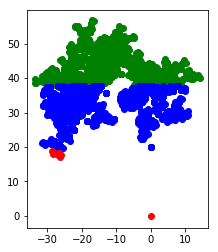

<Figure size 432x288 with 0 Axes>

In [100]:
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(upper_third[:,2], upper_third[:,1], color='green')
plt.scatter(middle_third[:,2], middle_third[:,1], color='blue')
plt.scatter(lower_third[:,2], lower_third[:,1], color='red')
plt.show()
plt.savefig('z.png')

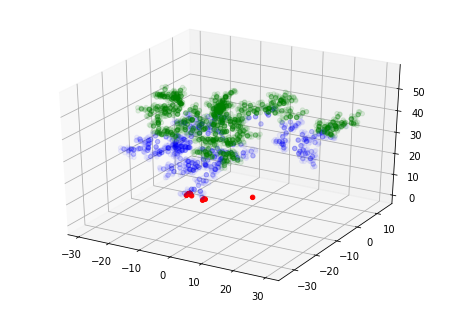

In [92]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pyplot.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = middle_third[:,0]
sequence_containing_y_vals = middle_third[:,2]
sequence_containing_z_vals = middle_third[:,1]

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, color='blue', alpha=0.05)

sequence_containing_x_vals = upper_third[:,0]
sequence_containing_y_vals = upper_third[:,2]
sequence_containing_z_vals = upper_third[:,1]

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, color='green', alpha=0.1)

sequence_containing_x_vals = lower_third[:,0]
sequence_containing_y_vals = lower_third[:,2]
sequence_containing_z_vals = lower_third[:,1]

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, color='red', alpha=1)

pyplot.show()